# 프로젝트: Vocabulary Size 변경, 시도하기

18번 노드의 절차를 근거로 Vocabulary Size를 20,000개, 모든 단어, 5,000개. 순으로 설정해 진행한다. 

In [225]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('=3')

=3


# num_words=20,000

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('=3')

=3


In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=20000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
print(y_train[0])
print(y_test[0])

3
3


In [6]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


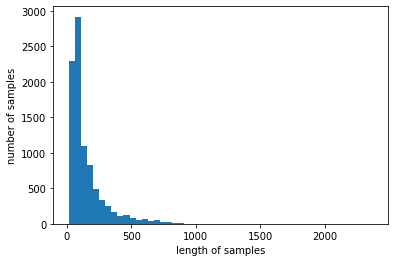

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

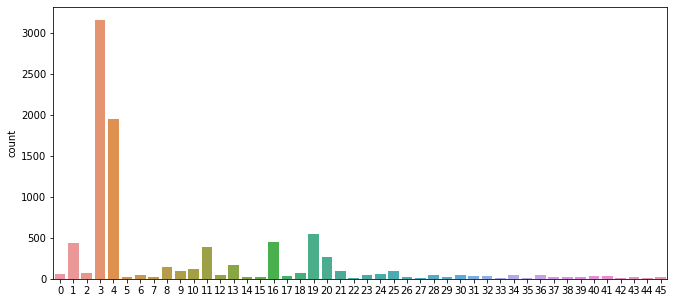

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

565248/550378 [==============================] - 0s 0us/step
=3


In [11]:
word_index['the']

1

In [12]:
word_index['it']

13

In [13]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [14]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [15]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [16]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [17]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [18]:
# Test 데이터 변환
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))  # 변환된 x_test 데이터의 길이 출력

2246


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [20]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 18479)


Document Term Matrix, DTM은 사이킷런의 CountVectorizer()를 통해서 생성. 학습용 뉴스의 수가 총 8,982개이기 때문에 행의 개수는 8,982개, num_words=20,000이라는 값을 사용했고, DTM 열의 개수는 이보다 적은 18,479개. DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거했기 때문이라 판단됨.

In [21]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 18479)


나이브 베이즈 분류기

In [22]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


In [23]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [24]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

# 데이터 크기 확인
assert len(y_test) == tfidfv_test.shape[0], "y_test와 tfidfv_test의 샘플 크기가 일치하지 않습니다."

# 정확도 계산
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6193232413178985


In [25]:
x_test[3]

'<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to prepay principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the noteholders exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [26]:
#이 샘플의 레이블은?
y_test[3]

4

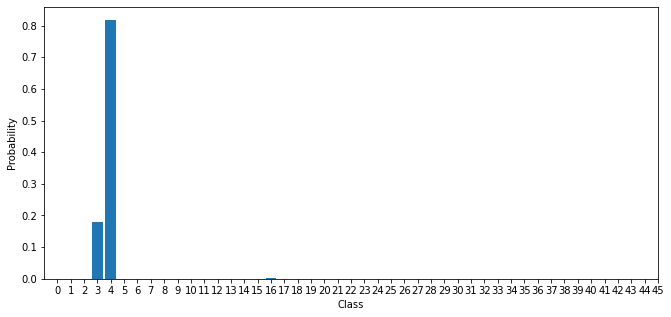

In [27]:
#  과연 모델은 제대로 예측하고 있는지 그리고 어느 정도의 확신을 가지고 판단하는지 모델이 결정한 확률을 그래프로 시각화해봅시다.

probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [28]:
model.predict(tfidfv_test[3])

array([4])

모델은 4번 클래스를 약 81%의 확률로 확신하는데, 18%의 확률로 3번 클래스라고 판단합니다. 80% 웃도는 확률로서 모델이 예측한 레이블은 4번이라 할 수 있음. 나머지 1%는 16번 클래스.

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


Precision, Recall & F1 Score

In [30]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.39      0.52       105
           2       0.00      0.00      0.00        20
           3       0.75      0.92      0.82       813
           4       0.46      0.96      0.62       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.04      0.08        25
          10       0.00      0.00      0.00        30
          11       0.76      0.37      0.50        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.74      0.28      0.41        99
          17       0.00    

Confusion Matrix

In [31]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


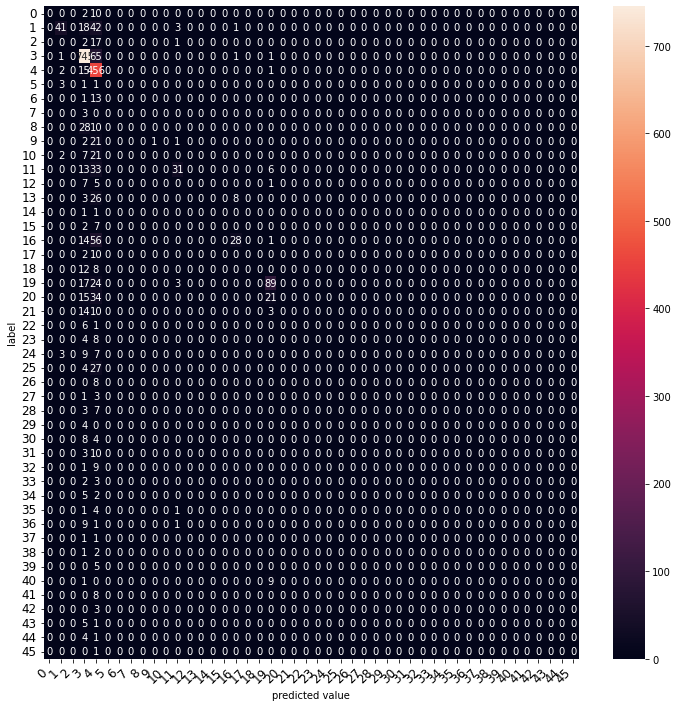

In [32]:
graph_confusion_matrix(model, tfidfv_test, y_test)

Complement Naive Bayes Classifier(CNB)

In [33]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [34]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7671415850400712


로지스틱 회귀(Logistic Regression)

In [35]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [36]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8156723063223509


선형 서포트 벡터 머신(Linear Support Vector Machine)

In [37]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [39]:
# Linear SVC 테스트 데이터에 대한 예측. 
#예측값과 실제값 비교

from sklearn.metrics import accuracy_score, classification_report

# 테스트 데이터에 대한 예측
predicted = lsvc.predict(tfidfv_test)

# 정확도 계산
print("정확도:", accuracy_score(y_test, predicted))

# 분류 보고서 출력
print("분류 보고서:")
print(classification_report(y_test, predicted))

정확도: 0.792520035618878
분류 보고서:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.73      0.75      0.74       105
           2       0.78      0.70      0.74        20
           3       0.92      0.92      0.92       813
           4       0.81      0.86      0.83       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       0.50      0.33      0.40         3
           8       0.59      0.68      0.63        38
           9       0.91      0.84      0.87        25
          10       0.89      0.83      0.86        30
          11       0.66      0.76      0.71        83
          12       0.44      0.31      0.36        13
          13       0.56      0.54      0.55        37
          14       1.00      1.00      1.00         2
          15       0.50      0.56      0.53         9
          16       0.62      0.72      0.67       

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


의사결정나무(Decision Tree)

In [40]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [41]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


랜덤 포레스트(Random Forest)

In [42]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 선언
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [43]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6714158504007124


GradientBoostingClassifier

In [44]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [45]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


보팅(Voting)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

# 각 모델 선언
logistic_regression = LogisticRegression(penalty='l2', random_state=0, max_iter=1000)
complement_nb = ComplementNB()
gradient_boosting = GradientBoostingClassifier(random_state=0)

# VotingClassifier 선언 (Soft Voting)
voting_classifier = VotingClassifier(
    estimators=[
        ('logistic', logistic_regression),
        ('cnb', complement_nb),
        ('gb', gradient_boosting)
    ],
    voting='soft'
)

# 모델 학습
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('cnb', ComplementNB()),
                             ('gb',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [47]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.798753339269813


# num_words=None

In [226]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [227]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [228]:
from collections import Counter
import numpy as np

# 전체 단어의 빈도수 계산
word_counts = Counter(word for sample in x_train for word in sample)

# 상위 50개 단어 확인
most_common_words = word_counts.most_common(50)
print(f"상위 50개 단어: {most_common_words}")

# 고유 단어 수 계산
unique_words = len(word_counts)
print(f"전체 고유 단어 수: {unique_words}")


상위 50개 단어: [(4, 65949), (5, 33791), (6, 32262), (7, 26309), (8, 23857), (9, 23841), (10, 23610), (11, 15823), (12, 13340), (13, 12022), (14, 11901), (15, 10696), (16, 9939), (1, 8982), (17, 8946), (18, 8842), (19, 8568), (20, 8458), (21, 8336), (22, 7466), (23, 7292), (24, 7231), (25, 6871), (26, 6703), (27, 6648), (28, 6447), (29, 6156), (30, 6055), (31, 5773), (32, 5736), (33, 5630), (34, 5601), (35, 5291), (36, 5098), (37, 5035), (38, 4987), (39, 4619), (40, 4442), (41, 4397), (42, 4281), (43, 4245), (45, 4094), (44, 4046), (46, 3871), (47, 3748), (49, 3649), (48, 3616), (50, 3493), (52, 3382), (51, 3358)]
전체 고유 단어 수: 28138


In [229]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [230]:
print(y_train[0])
print(y_test[0])

3
3


In [231]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


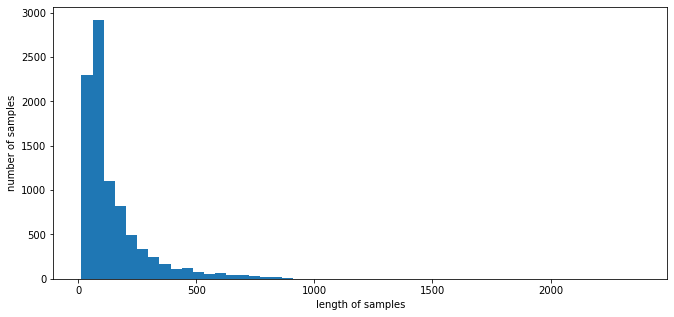

In [232]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

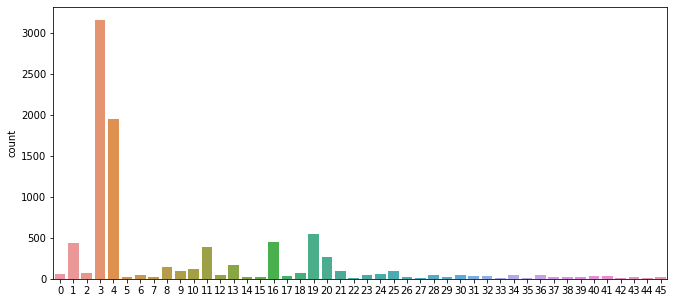

In [233]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [234]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [236]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [237]:
word_index['the']

1

In [238]:
word_index['it']

13

In [239]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [240]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [241]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [242]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [243]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [244]:
# Test 데이터 변환
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))  # 변환된 x_test 데이터의 길이 출력

2246


In [245]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [246]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

In [247]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [248]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


전체 고유 단어 수: 28,138개이지만 DTM 열의 개수는 26,506로 출력되었다. 
이유는 DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거하기 때문인 것으로 판단된다.

In [249]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


나이브 베이즈 분류기

In [250]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


In [251]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [252]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

# 데이터 크기 확인
assert len(y_test) == tfidfv_test.shape[0], "y_test와 tfidfv_test의 샘플 크기가 일치하지 않습니다."

# 정확도 계산
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


In [253]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [254]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


로지스틱 회귀(Logistic Regression)

In [255]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [256]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8165627782724845


선형 서포트 벡터 머신(Linear Support Vector Machine)

In [257]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [258]:
# Linear SVC 테스트 데이터에 대한 예측해보세요. 
#예측값과 실제값 비교해보세요
from sklearn.metrics import accuracy_score, classification_report

# 테스트 데이터에 대한 예측
predicted = lsvc.predict(tfidfv_test)

# 정확도 계산
print("정확도:", accuracy_score(y_test, predicted))

# 분류 보고서 출력
print("분류 보고서:")
print(classification_report(y_test, predicted))

정확도: 0.792520035618878
분류 보고서:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.76      0.75      0.76       105
           2       0.61      0.70      0.65        20
           3       0.90      0.91      0.91       813
           4       0.82      0.84      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       0.50      0.67      0.57         3
           8       0.61      0.74      0.67        38
           9       0.88      0.84      0.86        25
          10       0.81      0.83      0.82        30
          11       0.68      0.73      0.71        83
          12       0.45      0.38      0.42        13
          13       0.64      0.62      0.63        37
          14       1.00      1.00      1.00         2
          15       0.57      0.44      0.50         9
          16       0.62      0.72      0.66       

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


의사결정나무(Decision Tree)

In [259]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [260]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


랜덤 포레스트(Random Forest)

In [261]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 선언
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [262]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6544968833481746


GradientBoostingClassifier

In [263]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [264]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


보팅(Voting)

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

# 각 모델 선언
logistic_regression = LogisticRegression(penalty='l2', random_state=0, max_iter=1000)
complement_nb = ComplementNB()
gradient_boosting = GradientBoostingClassifier(random_state=0)

# VotingClassifier 선언 (Soft Voting)
voting_classifier = VotingClassifier(
    estimators=[
        ('logistic', logistic_regression),
        ('cnb', complement_nb),
        ('gb', gradient_boosting)
    ],
    voting='soft'
)

# 모델 학습
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('cnb', ComplementNB()),
                             ('gb',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [266]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8000890471950134


# num_words=5,000

In [71]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [72]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [73]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [74]:
print(y_train[0])
print(y_test[0])

3
3


In [75]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


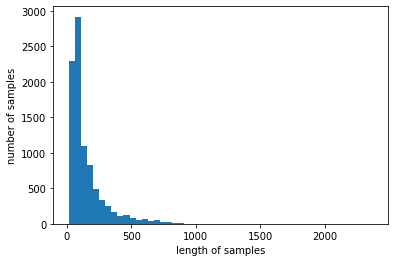

In [76]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

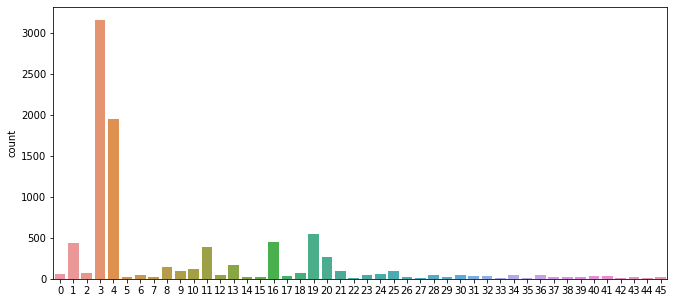

In [77]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [78]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [79]:
from tensorflow.keras.datasets import reuters

# Load Reuters dataset with word index
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_word = {v: k for k, v in word_index.items()}

# Sample sequence to decode
sequence = [4, 587, 23, 133, 6, 30, 515]

# Decode the sequence
decoded_sequence = [index_word.get(idx - 3, "<unk>") for idx in sequence]  # Adjust indices by 3 for reserved tokens

print("Decoded sequence:", decoded_sequence)

Decoded sequence: ['the', 'transaction', 'is', 'expected', 'to', 'be', 'completed']


In [80]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [81]:
word_index['the']

1

In [82]:
word_index['it']

13

In [83]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [84]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [85]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [86]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [88]:
# num_words=5000

word_index_5000 = [word for sample in x_train for word in sample]
unique_words_5000 = len(np.unique(word_index_5000))

print(f"num_words=5000에서 사용된 고유 단어 개수: {unique_words_5000}")

num_words=5000에서 사용된 고유 단어 개수: 4998


In [90]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [91]:
# Test 데이터 변환
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))  # 변환된 x_test 데이터의 길이 출력

2246


In [92]:
# num_words=5000

word_index_5000 = [word for sample in x_train for word in sample]
unique_words5000 = len(np.unique(word_index_5000))

print(f"num_words=5000에서 사용된 고유 단어 개수: {unique_words_5000}")

num_words=5000에서 사용된 고유 단어 개수: 4998


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [96]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [97]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


나이브 베이즈 분류기

In [98]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


In [100]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

# 데이터 크기 확인
assert len(y_test) == tfidfv_test.shape[0], "y_test와 tfidfv_test의 샘플 크기가 일치하지 않습니다."

# 정확도 계산
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6731967943009796


In [101]:
x_test[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the <unk> hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial <unk> and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the <unk> hill field reuter 3'

In [102]:
#이 샘플의 레이블은?
y_test[3]

4

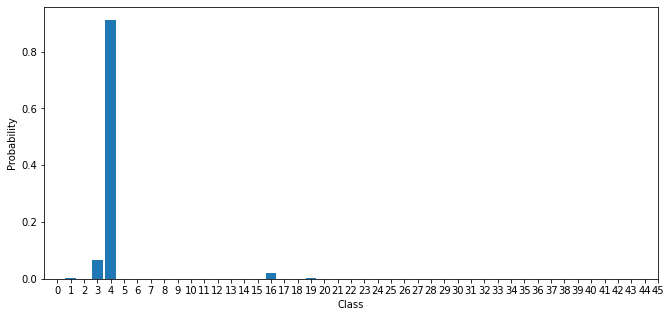

In [103]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [104]:
model.predict(tfidfv_test[3])

array([4])

Complement Naive Bayes Classifier(CNB)

In [105]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [106]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


로지스틱 회귀 Logistic Regression

In [107]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [108]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8036509349955476


선형 서포트 벡터 머신(Linear Support Vector Machine)

In [109]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [110]:
# Linear SVC 테스트 데이터에 대한 예측. 

#예측값과 실제값 비교해보세요
from sklearn.metrics import accuracy_score, classification_report

# 테스트 데이터에 대한 예측
predicted = lsvc.predict(tfidfv_test)

# 정확도 계산
print("정확도:", accuracy_score(y_test, predicted))

# 분류 보고서 출력
print("분류 보고서:")
print(classification_report(y_test, predicted))

정확도: 0.7764915405164737
분류 보고서:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.72      0.72      0.72       105
           2       0.85      0.85      0.85        20
           3       0.90      0.90      0.90       813
           4       0.80      0.83      0.82       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.60      0.71      0.65        38
           9       0.79      0.88      0.83        25
          10       0.87      0.87      0.87        30
          11       0.63      0.70      0.66        83
          12       0.31      0.38      0.34        13
          13       0.56      0.65      0.60        37
          14       1.00      1.00      1.00         2
          15       0.67      0.22      0.33         9
          16       0.68      0.70      0.69      

의사결정나무(Decision Tree)

In [111]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [112]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6179875333926982


랜덤 포레스트(Random Forest)

In [113]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 선언
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [114]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.701246660730187


그래디언트 부스팅 트리(GradientBoostingClassifier)

In [115]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [116]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.767586821015138


보팅(Voting)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

# 각 모델 선언
logistic_regression = LogisticRegression(penalty='l2', random_state=0, max_iter=1000)
complement_nb = ComplementNB()
gradient_boosting = GradientBoostingClassifier(random_state=0)

# VotingClassifier 선언 (Soft Voting)
voting_classifier = VotingClassifier(
    estimators=[
        ('logistic', logistic_regression),
        ('cnb', complement_nb),
        ('gb', gradient_boosting)
    ],
    voting='soft'
)

# 모델 학습
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('cnb', ComplementNB()),
                             ('gb',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [118]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7960819234194123


결과에 대한 회고

In [57]:
import pandas as pd

# 데이터 프레임 생성
data = {
    "Model": ["나이브 베이즈", "CNB", "로지스틱 회귀", "선형 서포트 벡터", "결정 트리", "랜덤 포레스트", "그래디언트 부스팅", "보팅"],
    "num_words=5,000":["0.6731", "0.7707", "0.8036", "0.7764", "0.6179", "0.7012", "0.7675", "0.7960"],
    "num_words=10,000":["0.6567", "0.7707", "0.8107", "0.7889", "0.6202", "0.6740", "0.7662", "0.7969"],
    "num_words=20,000":["0.6193", "0.7671", "0.8156", "0.7925", "0.6211", "0.6714", "0.7702", "0.7987"],
    "num_words=None":["0.5997", "0.7649", "0.8165", "0.7925", "0.6211", "0.6544", "0.7702", "0.800"]
}

df = pd.DataFrame(data)

# 데이터 프레임 출력
display(df)


,Model,"num_words=5,000","num_words=10,000","num_words=20,000",num_words=None
0,나이브 베이즈,0.6731,0.6567,0.6193,0.5997
1,CNB,0.7707,0.7707,0.7671,0.7649
2,로지스틱 회귀,0.8036,0.8107,0.8156,0.8165
3,선형 서포트 벡터,0.7764,0.7889,0.7925,0.7925
4,결정 트리,0.6179,0.6202,0.6211,0.6211
5,랜덤 포레스트,0.7012,0.6740,0.6714,0.6544
6,그래디언트 부스팅,0.7675,0.7662,0.7702,0.7702
7,보팅,0.7960,0.7969,0.7987,0.800


지난 18번 노드의 num_words=10,000의 결과값을 포함해 총 4번의 실행 결과값을 표로 구성했다. Vocabulary Size가 클수록 정확도가 높아지는 모델은 '로지스틱 회귀', '선형 서포트 벡터 머신', '결정 트리', '보팅'이다. num_words=20,000과 num_words=None과의 수치는 큰 차이가 나지 않는다는 것도 확인할 수 있다.
Vocabulary Size가 작을수록 정확도가 높아지는 모델은 '나이브 베이즈 분류기', 'CNB', '랜덤 포레스트'이다. 특별한 경우는 '그래디언트 부스팅 트리'로서 증가 혹은 감소 추세 곡선에 포함되기 어려운 결과를 보여주고 있다.
로지스틱 회귀가 가장 높은 정확도를 보였고, 나이브 베이즈 분류기가 가장 낮은 정확도를 보였다.